In [ ]:
from utils import *

In [ ]:
# Add the parent directory to the path
sys.path.append(os.path.abspath('..'))

In [2]:
from evolution.entities import *
from evolution.selection import *
from evolution.crossover import *
from evolution.mutation import *
from evolution.algorithm import *
from tuning.configurations_tune import *
from tuning.parameters_tune import *

In [3]:
# Load the results from the CSV file
results = pd.read_csv('results/selection_results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results/selection_results.csv'

In [3]:
results = random_search(mode='detailed', n_runs=2, verbose_ga=False)

Configuration 1: xo_prob=0.78, mut_prob=0.35, n_swaps=5
  Run 1/2
  Run 2/2
Configuration 2: xo_prob=0.96, mut_prob=0.34, n_swaps=10
  Run 1/2
  Run 2/2


In [13]:
results

,xo_prob,mut_prob,n_swaps,fitness_history
0,0.78,0.35,5,"[[1.3474630541871921, 1.3474630541871921, 1.34..."
1,0.96,0.34,10,"[[1.2713822080556358, 1.3791161982034192, 1.37..."


In [9]:
results['fitness_history'] = results['fitness_history'].apply(json.loads)

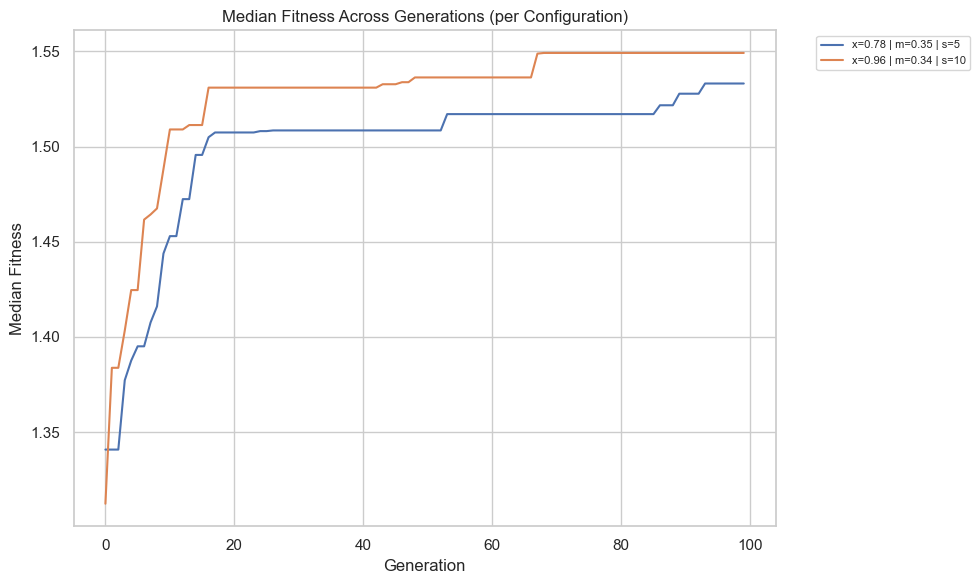

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for idx, row in results.iterrows():
    runs = row['fitness_history']                
    generations = len(runs[0])                  
    median_curve = np.median(runs, axis=0)      

    label = f"x={row['xo_prob']} | m={row['mut_prob']} | s={row['n_swaps']}"
    plt.plot(range(generations), median_curve, label=label)

plt.xlabel("Generation")
plt.ylabel("Median Fitness")
plt.title("Median Fitness Across Generations (per Configuration)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.grid(True)
plt.show()
